# 2007 


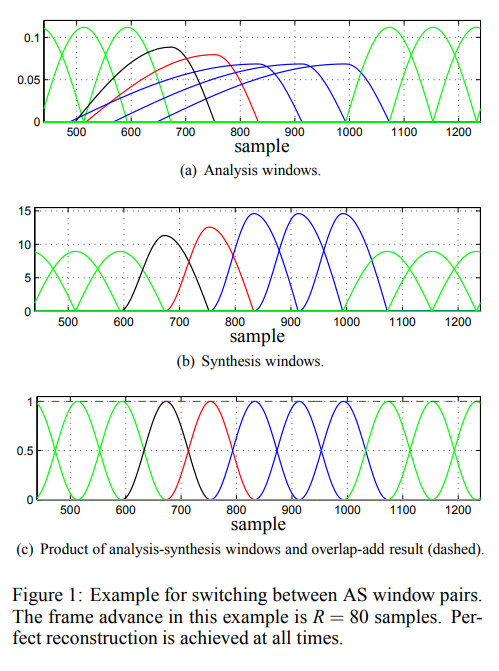


# SECTION 2.DFT Based Analysis-Synthesis System

$$ \begin{equation*}X_{k}(m)=\sum_{n=0}^{K-1}x(mR+n)h(n)e^{-2\pi kn/K}, \tag{1}\end{equation*} $$

## 3.1 Perfect Reconstruction (PR)

$$ \begin{equation*}h^{i}(n)=\{h_{1}^{i}(n),h_{2}^{i}(n),h_{3}^{i}(n),h_{4}^{i}(n)\} \tag{2}\end{equation*} $$


$$ \begin{align*}&h^{j}(n)f^{j}(n)\notag\\ &= \begin{cases}0, & 0\leq n < K-2M\\ Hann\ 2V(n-K+2M), & K-2M\leq n < K,\end{cases}\tag{3}\end{align*} $$



$$ \begin{equation*}Hann_{L}(n)=0.5\left(1-\cos(2\pi\frac{n}{L})\right),n=0, \ldots,L-1. \tag{4}\end{equation*} $$

## 3.3 System Delay

$$ \begin{equation*}\tau=\tau_{ola}+\tau_{gronp}+\tau_{process} \tag{5}\end{equation*} $$


# 4. Window Set Example

$$ \begin{equation*}\begin{split} h_{1}^{l}(n) &= f_{1}^{l}(n)=0,\\ h_{2}^{l}(n) &= f_{2}^{l}(n)=0,\\ h_{3}^{I}(n) &= f_{3}^{I}(n)=\sqrt{Hann_{2M}(n)},\\ h_{4}^{l}(n) &= f_{4}^{l}(n)=\sqrt{Hann_{2M}(n+M)}.\end{split}\end{equation*} $$



$$ \begin{equation*}\begin{split} h_{1}^{ll}(n) &= 0,\\ h_{2}^{II}(n) &= \sqrt{Hann_{2(K-M-d)}(n)},\\ h_{3}^{ll}(n) &= \sqrt{Hann_{2(K-M-d)}(n+K-2M-d)},\\ h_{4}^{II}(n) &= \sqrt{Hann_{2M}(n+M)}\end{split}\end{equation*} $$



$$ \begin{equation*}\begin{split} f_{1}^{ll}(n) &= f_{2}^{ll}(n)=0,\\ f_{3}^{Il}(n) =& \frac{Hann_{2M}(n)}{\sqrt{Hann_{2(K-M-d)}(n+K-2M-d)}},\\ f_{4}^{II}(n) &= \sqrt{Hann_{2M}(n+M)}.\end{split}\end{equation*} $$







# 2021 Deep Neural Network Based Low-Latency Speech Separation with Asymmetric Analysis-Synthesis Window Pair

[S. Wang, G. Naithani, A. Politis and T. Virtanen, "Deep Neural Network Based Low-Latency Speech Separation with Asymmetric Analysis-Synthesis Window Pair," 2021 29th European Signal Processing Conference (EUSIPCO), Dublin, Ireland, 2021, pp. 301-305, doi: 10.23919/EUSIPCO54536.2021.9616165.
keywords: {Deep learning;Training;Time-frequency analysis;Source separation;Signal processing algorithms;Europe;Speech enhancement;Monaural speaker separation;Low latency;Asymmetric windows;Deep clustering},](https://ieeexplore.ieee.org/abstract/document/9616165)


## A. Low-latency separation using asymmetric windows

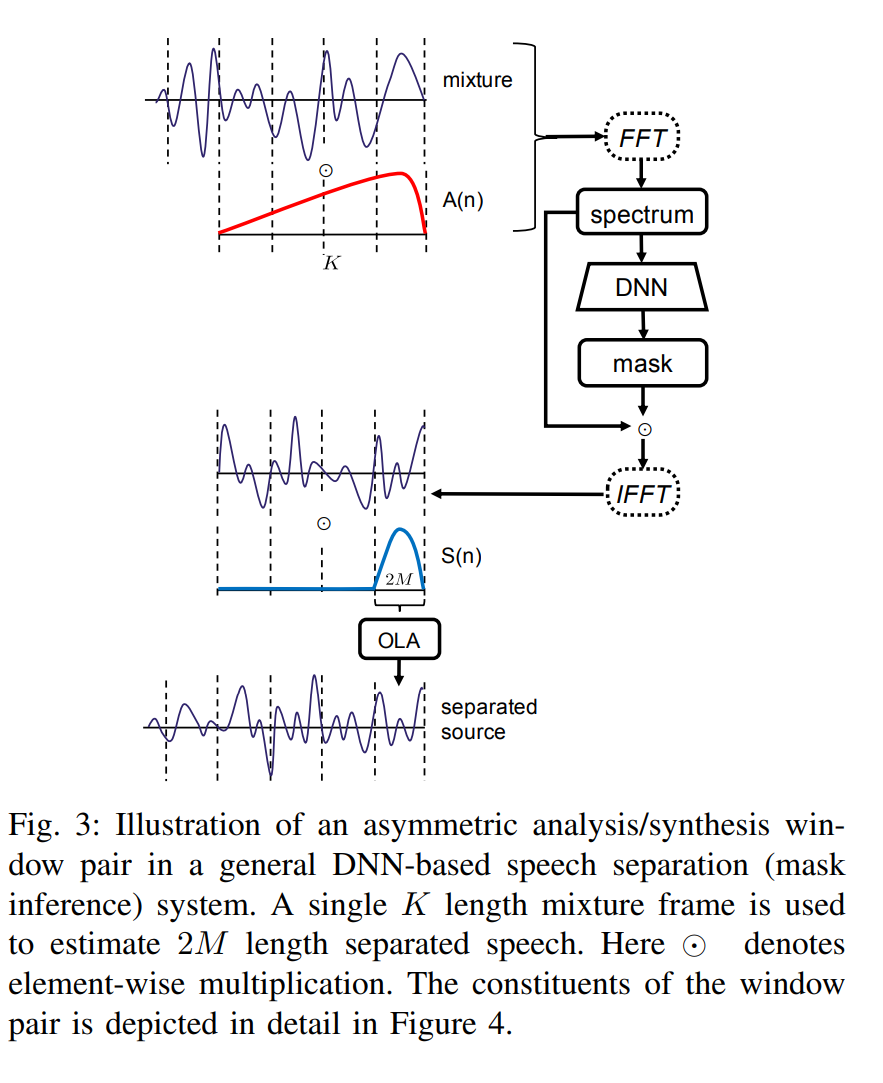


ed by using a larger
analysis and shorter synthesis window provided they fulfill
the Princen-Bradley condition


,
are first divided into K-sample frames with M-sample o

Each of these K-sample frames is then multiplied by an analysis window of the same 

a synthesis window of length 2M zero-padded to length K, is applied to the output time-domain frame before overlap-add

## B. Asymmetric windowing


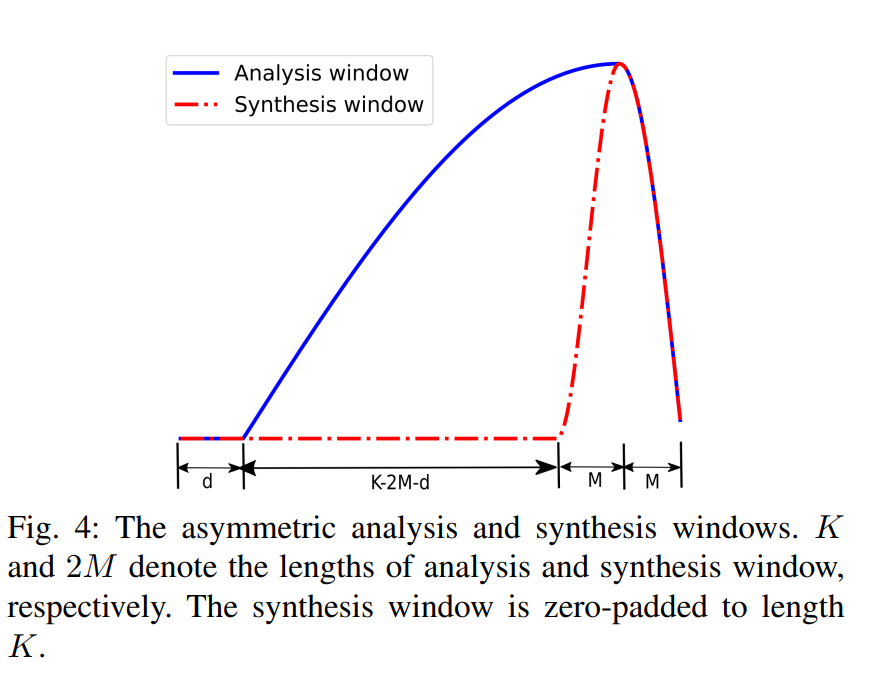


/tmp/ipykernel_431018/3933310192.py:1: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  hann_sym = signal.hann(512,sym= True)
/tmp/ipykernel_431018/3933310192.py:2: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  hann_asym = signal.hann(512,sym= False)


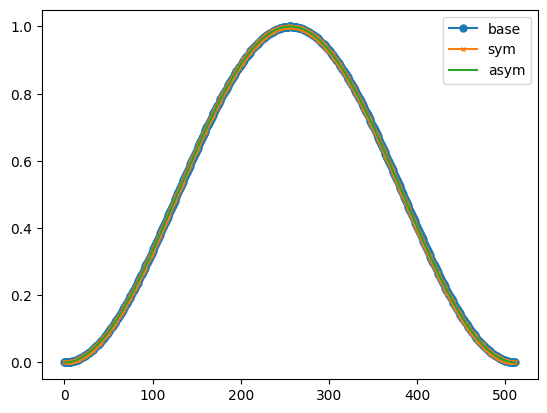

In [112]:
hann_sym = signal.hann(512,sym= True)
hann_asym = signal.hann(512,sym= False)
hann_base = hann_window(512)

plt.figure()
plt.plot(hann_base, marker='o',markersize=5)
plt.plot(hann_sym,  marker='x',markersize=3)
plt.plot(hann_asym)
plt.legend(["base","sym","asym"])


In [10]:
import matplotlib.pyplot as plt   
import IPython.display as ipd

In [181]:
import numpy as np
from scipy.fft import fft, ifft
import librosa as rs
import soundfile as sf
from scipy import signal
from numpy.lib.stride_tricks import as_strided
from scipy.fftpack import fft, ifft

"""
S. Wang, G. Naithani, A. Politis and T. Virtanen,
"Deep Neural Network Based Low-Latency Speech Separation with Asymmetric Analysis-Synthesis Window Pair,"
2021 29th European Signal Processing Conference (EUSIPCO), Dublin, Ireland, 2021, pp. 301-305, doi: 10.23919/EUSIPCO54536.2021.9616165.
keywords: {Deep learning;Training;Time-frequency analysis;Source separation;Signal processing algorithms;Europe;Speech enhancement;Monaural speaker separation;Low latency;Asymmetric windows;Deep clustering},

REF : https://ieeexplore.ieee.org/abstract/document/9616165
REF : https://github.com/shanwangshan/asymmetric_window/blob/main/Asymmetric_window_on_oracle.ipynb
"""
def hann_window(M):
    window = np.zeros(M)
    # (1)
    for n in range(M) : 
        window[n] = 0.5 * (1 - np.cos(2*np.pi * n / M))
    return window

def analysis_window(n_fft,winsize_long,winsize_short,hopsize) : 
    K = winsize_long
    M = winsize_short//2; # 64
    d = hopsize; #64
    #R = hopsize # frame advance
    
    pro_1 = K-M-d
    pro_2 = M
    win_pro_1 = hann_window(2*pro_1)
    win_pro_2 = hann_window(2*pro_2)

    # (3,4)
    win_an_1=np.zeros((d))
    win_an_2=np.sqrt(win_pro_1[:K-2*M-d])
    win_an_3=np.sqrt(win_pro_1[K-2*M-d:K-2*M-d+M])
    # (2)
    win_an_4=np.sqrt(win_pro_2[M:M+M])
    
    window_analysis = np.concatenate((win_an_1,win_an_2,win_an_3,win_an_4))
    return window_analysis

def synthesis_widnow(n_fft,winsize_long,winsize_short,hopsize) :
    K = winsize_long
    M = winsize_short//2; # 64
    d = hopsize; #64
    
    pro_1 = K-M-d
    pro_2 = M
    win_pro_1 = hann_window(2*pro_1)
    win_pro_2 = hann_window(2*pro_2)

    # (5)
    win_sy_3=(win_pro_2[:M])/np.sqrt(win_pro_1[K-2*M-d:K-2*M-d+M])
    # (2)
    win_sy_4=np.sqrt(win_pro_2[M:M+M])
    
    window_synthesis = np.concatenate((win_sy_3,win_sy_4)) 
    
    return window_synthesis

# STFT
def stft_asymmetric(x, frame_size, hop_size, window):
    n_frames = (len(x) - frame_size) // hop_size + 1
    stft_frames = []
    for i in range(n_frames):
        frame = x[i * hop_size: i * hop_size + frame_size] * window
        spectrum = np.fft.rfft(frame)
        stft_frames.append(spectrum)
    return np.array(stft_frames)

# iSTFT
def istft_asymmetric(stft_frames, frame_size, hop_size, window):
    K = frame_size
    M = hop_size
    winsize_short = 128
    stft_frames = np.transpose(stft_frames)
    
    n_frames = stft_frames.shape[1]
    signal_length = (n_frames - 1) * hop_size + frame_size
    output = np.zeros((n_frames*hop_size))
    for i in range(n_frames-1):
        a=stft_frames[:,i]
        b=np.conjugate(stft_frames[:,i][-2:0:-1])
        c=np.concatenate((a,b))
       
        out_long = ifft(c).real
        out_long_wnd = out_long[K-winsize_short:K]
        #out_long_wnd = out_long[-window_synthesis.shape[0]:]

        out_long_wnd = window*out_long_wnd
        output[i*hopsize:i*hopsize+2*M]=output[i*hopsize:i*hopsize+2*M]+ out_long_wnd

    return output

in (29390,) | STFT (452, 257) | out (28928,)


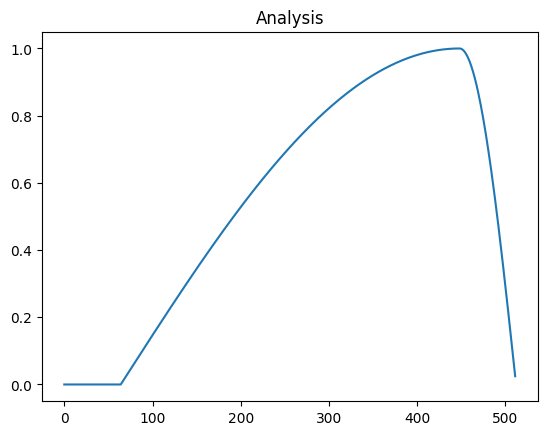

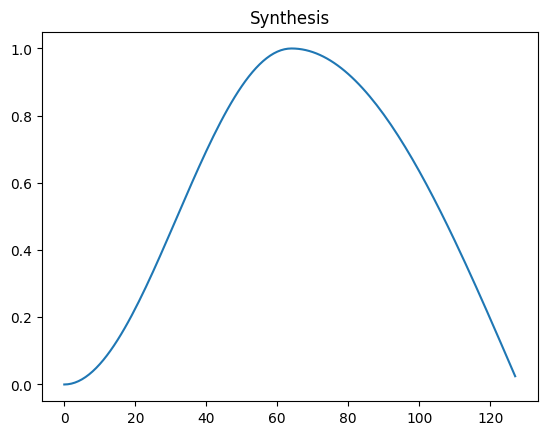

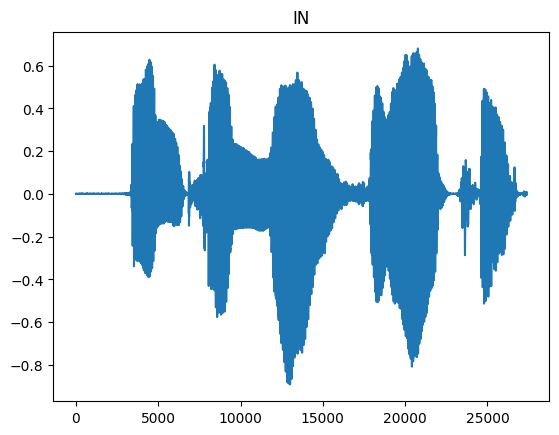

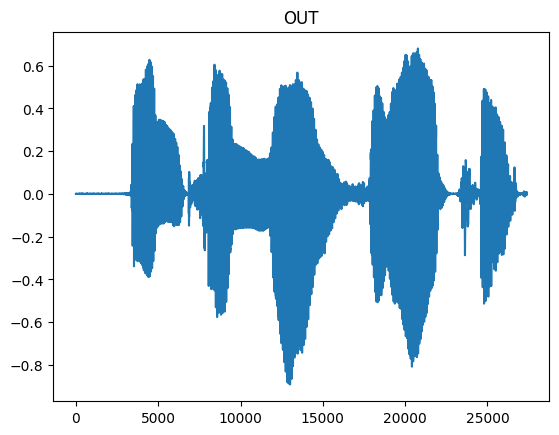

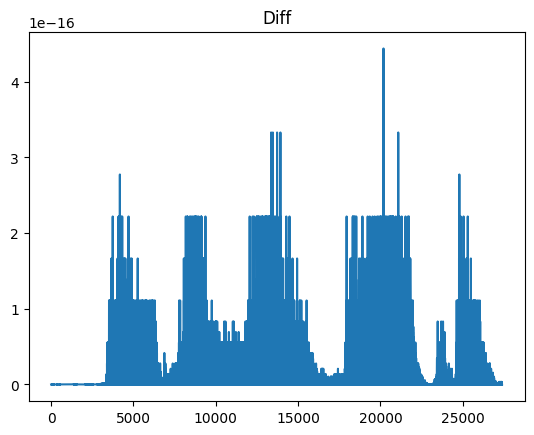

In [192]:
signal,sr = rs.load("data/female_1.wav",sr=16000)

n_fft = 512
winsize_short = 128 # 8ms
winsize_long = 512 # 32ms
hop_size = 64

# Analysis Phase
analysis = analysis_window(n_fft,winsize_long,winsize_short,hopsize)
synthesis = synthesis_widnow(n_fft,winsize_long,winsize_short,hopsize)


stft_frames = stft_asymmetric(signal,  n_fft,hop_size, analysis)
y = istft_asymmetric(stft_frames, n_fft, hop_size, synthesis)

print(f"in {signal.shape} | STFT {stft_frames.shape} | out {y.shape}")


y = y[384:len(x)]
x = x[:len(y)]


plt.figure()
plt.title("Analysis")
plt.plot(analysis)

plt.figure()
plt.title("Synthesis")
plt.plot(synthesis)


plt.figure()
plt.title("IN")
plt.plot(x)

ipd.display(ipd.Audio(x, rate=16000))

plt.figure()
plt.title("OUT")
plt.plot(y)

ipd.display(ipd.Audio(y, rate=16000))



plt.figure()
plt.title("Diff")
plt.plot(np.abs(x-y))

sf.write("out.wav",y,16000)



384 samples delay.. 32ms delay.. 

# Open repo
https://github.com/shanwangshan/asymmetric_window/blob/main/Asymmetric_window_on_oracle.ipynb

(257, 458)


/tmp/ipykernel_431018/3875401842.py:12: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  win_pro_1 = signal.hann(2*pro_1,sym= False)
/tmp/ipykernel_431018/3875401842.py:13: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  win_pro_2 = signal.hann(2*pro_2,sym= False)
/tmp/ipykernel_431018/3875401842.py:50: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  win_pro_1 = signal.hann(2*pro_1,sym= False)
/tmp/ipykernel_431018/3875401842.py:51: DeprecationW

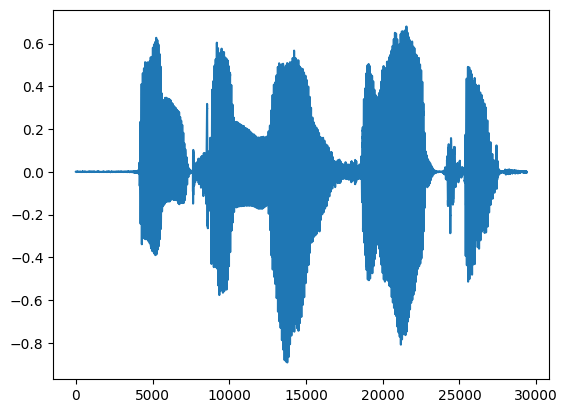

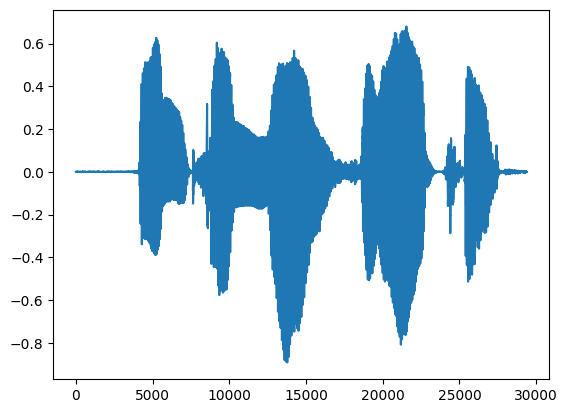

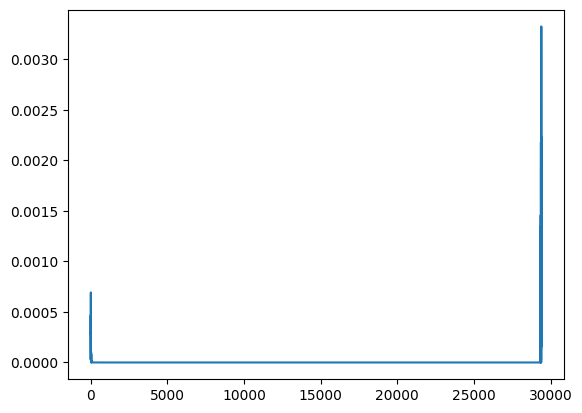

In [211]:
from scipy import signal

def AsymSTFT(s,n_fft,winsize_long,winsize_short,hopsize):
    
    K = winsize_long
    M = winsize_short//2; # 64
    d = hopsize; #64
    #R = hopsize # frame advance
    
    pro_1 = K-M-d
    pro_2 = M
    win_pro_1 = signal.hann(2*pro_1,sym= False)
    win_pro_2 = signal.hann(2*pro_2,sym= False)
    
    win_an_1=np.zeros((d))
    win_an_2=np.sqrt(win_pro_1[:K-2*M-d])
    win_an_3=np.sqrt(win_pro_1[K-2*M-d:K-2*M-d+M])
    win_an_4=np.sqrt(win_pro_2[M:M+M])
    
    window_analysis = np.concatenate((win_an_1,win_an_2,win_an_3,win_an_4))
    
    sig_padded = np.pad(s,(winsize_long-winsize_short,0),'constant')
    #sig_padded = s
    n_frames=int((len(sig_padded)-K)/hopsize)+1
        
    y_frames = as_strided(sig_padded, shape=(K, n_frames),
                          strides=(sig_padded.itemsize, hopsize * sig_padded.itemsize))
    
    spectrogram_long = np.zeros((n_fft//2+1,n_frames),dtype=np.complex_)
    for i in np.arange(n_frames):
        
        
        a=y_frames[:,i]
        b=np.pad(a,(0,(n_fft-K)),'constant')
        
        window_analysis_ = np.pad(window_analysis,(0,n_fft-K),'constant')
        window_frame=b*window_analysis_
        spectra=fft(window_frame)
        spectra=spectra[:n_fft//2+1] 
        spectrogram_long[:,i]=spectra
    return spectrogram_long,np.abs(spectrogram_long),window_analysis
    
def AsymISTFT(spectrogram_long,s,winsize_long,winsize_short,hopsize):
     K = winsize_long
     M = winsize_short//2; # 64
     d = hopsize; #64
    
     pro_1 = K-M-d
     pro_2 = M
     win_pro_1 = signal.hann(2*pro_1,sym= False)
     win_pro_2 = signal.hann(2*pro_2,sym= False)
     
     win_sy_3=(win_pro_2[:M])/np.sqrt(win_pro_1[K-2*M-d:K-2*M-d+M])
     win_sy_4=np.sqrt(win_pro_2[M:M+M])
    
     window_synthesis = np.concatenate((win_sy_3,win_sy_4)) 
     n_frames=spectrogram_long.shape[1]
     output = np.zeros((s.shape[0]))
     for n_f in np.arange(n_frames):
        a=spectrogram_long[:,n_f]
        b=np.conjugate(spectrogram_long[:,n_f][-2:0:-1])
        c=np.concatenate((a,b))
       
        out_long = ifft(c).real
        out_long_wnd = out_long[K-winsize_short:K]
        #out_long_wnd = out_long[-window_synthesis.shape[0]:]
        out_long_wnd = window_synthesis*out_long_wnd
    
        output[n_f*hopsize:n_f*hopsize+2*M]=output[n_f*hopsize:n_f*hopsize+2*M]+ out_long_wnd

     return output, window_synthesis

n_fft =512
winsize_short = 128 # 8ms
winsize_long = 256 # 32ms
hopsize = winsize_short//2 # 4ms

s1,sr = sf.read("data/female_1.wav") 
spec0,spec_input_mix,window_analysis= AsymSTFT(mix,n_fft,winsize_long,winsize_short,hopsize)  
print(spec0.shape)
es_s1_tr,window_synthesis=AsymISTFT(spec0,mix,winsize_long,winsize_short,hopsize)         
es_s1_tr=es_s1_tr[:np.min((len(es_s1_tr),len(s1)))] 

ipd.display(ipd.Audio(s1, rate=16000))
ipd.display(ipd.Audio(es_s1_tr, rate=16000))

plt.figure()
plt.plot(s1)
plt.figure()
plt.plot(es_s1_tr)
plt.figure()
plt.plot(np.abs(s1-es_s1_tr))